In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1.a)

In [2]:
df = pd.read_csv('./Bases/precos_carros_brasil.csv')
df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


In [3]:
df.shape

(267542, 11)

In [4]:
df.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

### 1.b)

In [5]:
df.isna().sum()

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

In [6]:
df.isna()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
267537,True,True,True,True,True,True,True,True,True,True,True
267538,True,True,True,True,True,True,True,True,True,True,True
267539,True,True,True,True,True,True,True,True,True,True,True
267540,True,True,True,True,True,True,True,True,True,True,True


In [7]:
df[df.isna()]

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
267537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.dropna(how='all')
df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


In [9]:
df.shape

(202297, 11)

In [10]:
267542  - 202297

65245

In [11]:
df.isna().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64

### 1.c)

In [12]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
202292    False
202293    False
202294    False
202295    False
202296    False
Length: 202297, dtype: bool

In [13]:
df.duplicated().any()

True

In [14]:
df.duplicated().sum()

2

### 1.d)

In [15]:
df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


In [16]:
df.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

In [17]:
df.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

In [18]:
dados_categoricos = df.select_dtypes(include=['object'])
dados_numericos = df.select_dtypes(exclude=['object'])

In [19]:
dados_categoricos.head()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1
1,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1
2,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1
3,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1
4,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6"


In [20]:
dados_numericos.head()

,year_of_reference,year_model,avg_price_brl
0,2021.0,2002.0,9162.0
1,2021.0,2001.0,8832.0
2,2021.0,2000.0,8388.0
3,2021.0,2000.0,8453.0
4,2021.0,2001.0,12525.0


In [21]:
dados_categoricos.describe()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
count,202297,202297,202297,202297,202297,202297,202297,202297
unique,12,2091,202295,6,2112,3,2,29
top,January,003281-6,3r6c277cnqcb,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,24260,425,2,44962,425,168685,161885,47420


In [22]:
dados_numericos.describe()

,year_of_reference,year_model,avg_price_brl
count,202297.000000,202297.000000,202297.000000
mean,2021.564694,2011.271527,52756.909153
std,0.571903,6.376234,51628.677716
min,2021.000000,2000.000000,6647.000000
25%,2021.000000,2006.000000,22855.000000
50%,2022.000000,2012.000000,38027.000000
75%,2022.000000,2016.000000,64064.000000
max,2023.000000,2023.000000,979358.000000


### 1.e)

In [23]:
dados_categoricos['model'].value_counts()

model
Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
                                         ... 
STEPWAY Zen Flex 1.0 12V Mec.               2
Saveiro Robust 1.6 Total Flex 16V CD        2
Saveiro Robust 1.6 Total Flex 16V           2
Gol Last Edition 1.0 Flex 12V 5p            2
Polo Track 1.0 Flex 12V 5p                  2
Name: count, Length: 2112, dtype: int64

In [24]:
dados_categoricos['brand'].value_counts()

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33151
Renault            29192
Nissan             12090
Name: count, dtype: int64

### 1.f)

### 2.a)

### 3.a)

In [25]:
df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


In [26]:
df.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

In [27]:
df['engine_size'] = df['engine_size'].str.replace(',', '.').astype(float)
df.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size           float64
year_model            float64
avg_price_brl         float64
dtype: object

In [28]:
df['year_model'] = df['year_model'].astype(int)
df['year_of_reference'] = df['year_of_reference'].astype(int)

In [29]:
df.dtypes

year_of_reference       int32
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size           float64
year_model              int32
avg_price_brl         float64
dtype: object

In [30]:
df['gear'].value_counts()

gear
manual       161885
automatic     40412
Name: count, dtype: int64

In [31]:
df['gear'] = LabelEncoder().fit_transform(df['gear'])
df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,1,1.0,2002,9162.0
1,2021,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,1,1.0,2001,8832.0
2,2021,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,1,1.0,2000,8388.0
3,2021,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,1,1.0,2000,8453.0
4,2021,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,1,1.6,2001,12525.0


In [32]:
df.dtypes

year_of_reference       int32
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                    int32
engine_size           float64
year_model              int32
avg_price_brl         float64
dtype: object

In [33]:
dados_numericos = df.select_dtypes(exclude=['object'])

In [34]:
X = dados_numericos.drop(['avg_price_brl'], axis=1)
X.head()

,year_of_reference,gear,engine_size,year_model
0,2021,1,1.0,2002
1,2021,1,1.0,2001
2,2021,1,1.0,2000
3,2021,1,1.0,2000
4,2021,1,1.6,2001


In [35]:
Y = dados_numericos['avg_price_brl']
Y.head()

0     9162.0
1     8832.0
2     8388.0
3     8453.0
4    12525.0
Name: avg_price_brl, dtype: float64

### 3.b)

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

### 3.c)

#### Random Forest

In [45]:
# Algoritmo Random Forest, sem especificar nenhum parâmetro (número de árvores, número de ramificações, etc)
model_rf = RandomForestRegressor()

In [46]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_rf.fit(X_train, Y_train)

RandomForestRegressor()

#### XGBoost

In [54]:
model_xgboost = XGBRegressor()

In [55]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_xgboost.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
# Predição dos valores de salário com base nos dados de teste
valores_preditos_xgboost = model_xgboost.predict(X_test)
valores_preditos_xgboost

array([ 43151.24 ,  13617.416,  24736.297, ...,  12531.835,  24180.03 ,
       179005.39 ], dtype=float32)

In [47]:
# Predição dos valores de salário com base nos dados de teste
valores_preditos_rf = model_rf.predict(X_test)

In [48]:
# Valores preditos
valores_preditos_rf

array([ 43080.88846706,  13493.74135044,  24697.08210634, ...,
        12591.58472261,  24391.1177179 , 179108.63814565])

180634     41426.0
13130      10989.0
163316     27673.0
121463     27854.0
14044      57102.0
            ...   
150836     28758.0
132807    107819.0
105956     12844.0
57891      27389.0
156364    177188.0
Name: avg_price_brl, Length: 50575, dtype: float64

<Axes: >

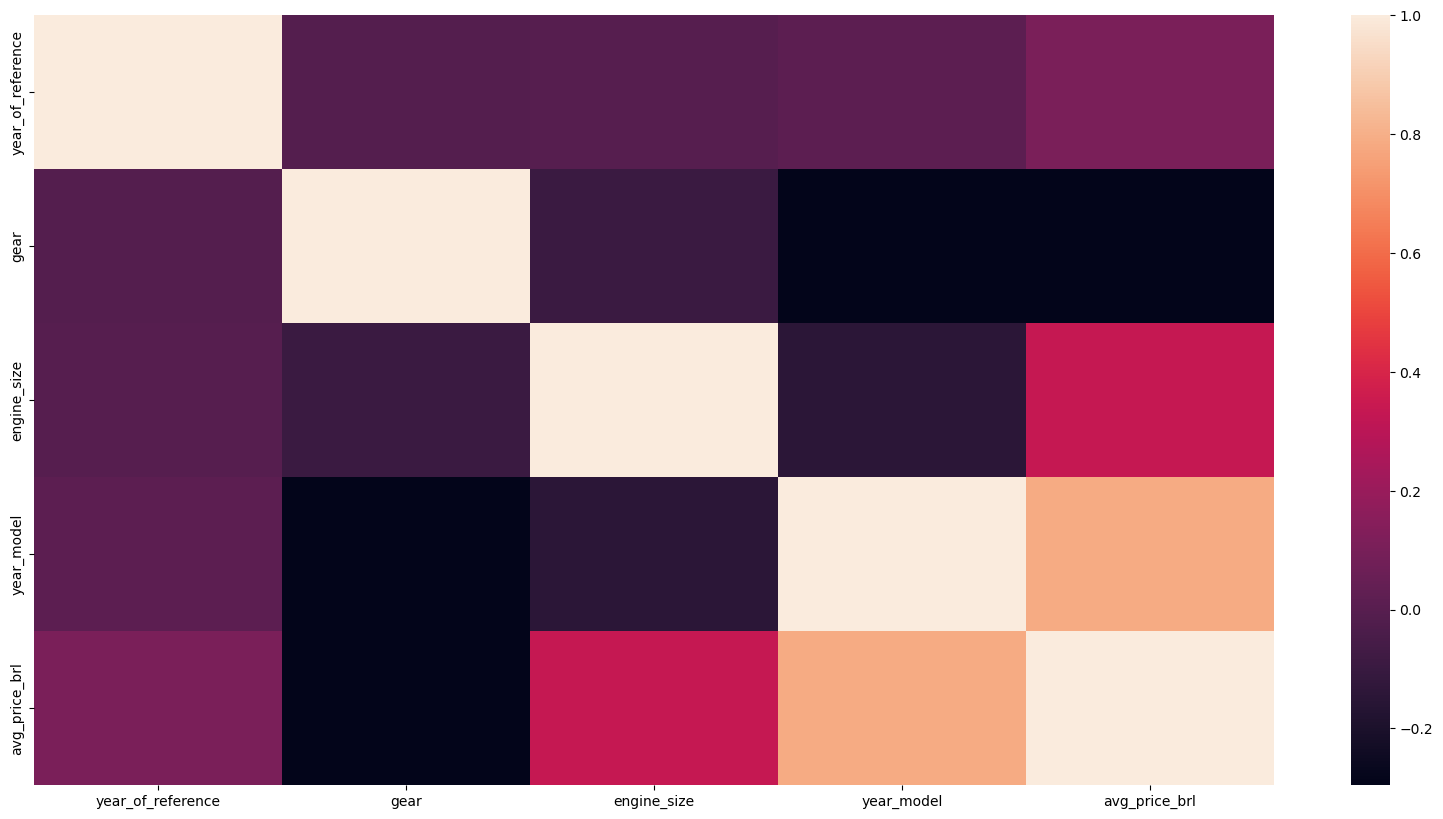

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(dados_numericos.corr("spearman"))

In [41]:
dados_numericos.corr()

,year_of_reference,gear,engine_size,year_model,avg_price_brl
year_of_reference,1.000000,-0.009849,-0.001262,0.016463,0.091886
gear,-0.009849,1.000000,-0.024912,-0.297439,-0.282313
engine_size,-0.001262,-0.024912,1.000000,-0.137125,0.458823
year_model,0.016463,-0.297439,-0.137125,1.000000,0.560210
avg_price_brl,0.091886,-0.282313,0.458823,0.560210,1.000000
